In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
uts = pd.read_csv(r'C:\Users\Lenovo\Documents\Tugas Kuliah\Sems 5\Mesin Learning\UTS\Dataset UTS_Gasal 2425.csv')
uts.head(10000)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.3,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.9,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.9,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.0,Basic


In [3]:
print("=" * 50)
print("Informasi DataFrame:")
print("=" * 50)
uts.info()
print("\n")

print("=" * 50)
print("Jumlah Nilai Kosong per Kolom:")
print("=" * 50)
print(uts.isnull().sum())
print("\n")

print("=" * 50)
print("Jumlah Total Baris Duplikat:")
print("=" * 50)
print(uts.duplicated().sum())
print("\n")

if uts.duplicated().sum() > 0:
    print("=" * 50)
    print("Detail Baris Duplikat:")
    print("=" * 50)
    print(uts[uts.duplicated()])
else:
    print("=" * 50)
    print("Tidak Ditemukan Baris Duplikat dalam DataFrame.")
    print("=" * 50)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  pr

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

uts.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [5]:
df_properti = uts.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

In [6]:
X = df_properti.drop(columns=['category', 'price'], axis=1)
y = df_properti['price']

X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X, y, test_size=0.30, random_state=95)
print(f"Shape of X_train: {X_trainReg.shape}")
print(f"Shape of X_test: {X_testReg.shape}")

Shape of X_train: (7000, 16)
Shape of X_test: (3000, 16)


In [7]:
print(X.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom'],
      dtype='object')


In [8]:
cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_trainReg_enc = transformer.fit_transform(X_trainReg)
X_testReg_enc = transformer.transform(X_testReg)

df_trainReg_enc = pd.DataFrame(X_trainReg_enc, columns=transformer.get_feature_names_out())
df_testReg_enc = pd.DataFrame(X_testReg_enc, columns=transformer.get_feature_names_out())

df_trainReg_enc.head(10)
df_testReg_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,87.00000,74.00000,94427.00000,3.00000,6.00000,2002.00000,9076.00000,8573.00000,860.00000,1.00000
1,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,12.00000,4.00000,76222.00000,2.00000,3.00000,2009.00000,1987.00000,8788.00000,443.00000,0.00000
2,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,47.00000,84.00000,2192.00000,7.00000,9.00000,2006.00000,5620.00000,7860.00000,554.00000,4.00000
3,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,86.00000,68.00000,42101.00000,8.00000,6.00000,2005.00000,6355.00000,5668.00000,743.00000,3.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,92.00000,8.00000,95468.00000,5.00000,7.00000,2002.00000,9655.00000,5678.00000,840.00000,2.00000
5,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,41.00000,98.00000,51712.00000,4.00000,1.00000,2004.00000,6907.00000,6416.00000,871.00000,0.00000
6,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,33.00000,32.00000,48601.00000,9.00000,1.00000,2012.00000,6833.00000,9708.00000,694.00000,3.00000
7,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,54.00000,10.00000,89174.00000,7.00000,10.00000,1999.00000,8930.00000,4203.00000,871.00000,8.00000
8,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,...,4.00000,3.00000,63144.00000,8.00000,2.00000,2002.00000,4238.00000,7147.00000,140.00000,8.00000
9,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,17.00000,24.00000,1451.00000,2.00000,1.00000,1995.00000,919.00000,6775.00000,862.00000,10.00000


In [9]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

print(X_trainReg_enc)

[[1.00 0.00 1.00 ... 8149.00 816.00 3.00]
 [1.00 0.00 0.00 ... 331.00 814.00 2.00]
 [1.00 0.00 0.00 ... 8197.00 173.00 9.00]
 ...
 [1.00 0.00 0.00 ... 7733.00 111.00 10.00]
 [0.00 1.00 1.00 ... 6453.00 130.00 1.00]
 [1.00 0.00 0.00 ... 3497.00 107.00 10.00]]


In [10]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=95)

X_folds = []
y_folds = []

for train_index, test_index in kf.split(X_trainReg_enc):
    X_folds.append((X_trainReg_enc[train_index], X_trainReg_enc[test_index]))
    y_folds.append((y_trainReg.iloc[train_index], y_trainReg.iloc[test_index]))

In [11]:
st_scaler = StandardScaler()
X_trainReg_stscaled = st_scaler.fit_transform(X_trainReg_enc)
X_testReg_stscaled = st_scaler.transform(X_testReg_enc)

selector_kbest = SelectKBest(score_func=f_regression, k='all')
X_trainReg_kbest = selector_kbest.fit_transform(X_trainReg_stscaled, y_trainReg)
X_testReg_kbest = selector_kbest.transform(X_testReg_stscaled)

lasso_kbest_model = Lasso(alpha=1.0)
lasso_kbest_model.fit(X_trainReg_kbest, y_trainReg)
y_pred_lasso_kbest = lasso_kbest_model.predict(X_testReg_kbest)
mse_lasso_kbest = mean_squared_error(y_testReg, y_pred_lasso_kbest)
print("Lasso SelectKBest - Berhasil")

Lasso SelectKBest - Berhasil


In [12]:
minmax_scaler = MinMaxScaler()
X_trainReg_mmscaled = minmax_scaler.fit_transform(X_trainReg_enc)
X_testReg_mmscaled = minmax_scaler.transform(X_testReg_enc)

selector_percentile = SelectPercentile(score_func=f_regression, percentile=50)
X_trainReg_percentile = selector_percentile.fit_transform(X_trainReg_mmscaled, y_trainReg)
X_testReg_percentile = selector_percentile.transform(X_testReg_mmscaled)

lasso_percentile_model = Lasso(alpha=1.0)
lasso_percentile_model.fit(X_trainReg_percentile, y_trainReg)
y_pred_lasso_percentile = lasso_percentile_model.predict(X_testReg_percentile)
mse_lasso_percentile = mean_squared_error(y_testReg, y_pred_lasso_percentile)
print("Lasso SelectPercentile - Berhasil")

Lasso SelectPercentile - Berhasil


In [13]:
rf_kbest_model = RandomForestRegressor(random_state=95)
rf_kbest_model.fit(X_trainReg_kbest, y_trainReg)
y_pred_rf_kbest = rf_kbest_model.predict(X_testReg_kbest)
mse_rf_kbest = mean_squared_error(y_testReg, y_pred_rf_kbest)
print("Random Forest KBest - Berhasil")

Random Forest KBest - Berhasil


In [14]:
rf_percentile_model = RandomForestRegressor(random_state=95)
rf_percentile_model.fit(X_trainReg_percentile, y_trainReg)
y_pred_rf_percentile = rf_percentile_model.predict(X_testReg_percentile)
mse_rf_percentile = mean_squared_error(y_testReg, y_pred_rf_percentile)
print("Random Forest Percentile - Berhasil")

Random Forest Percentile - Berhasil


In [15]:
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE'])

In [16]:
def evaluate_model_with_grid_search(model, params, X_train, y_train, X_test, y_test, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=95)

    grid_search = GridSearchCV(model, params, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results_df.loc[len(results_df)] = [model_name, mae, mse, rmse]

    return y_pred, best_model

In [17]:
from sklearn.model_selection import KFold

def evaluate_model_with_grid_search(model, params, X_train, y_train, X_test, y_test, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=95)

    grid_search = GridSearchCV(model, params, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results_df.loc[len(results_df)] = [model_name, mae, mse, rmse]

    return y_pred, best_model

**Evaluasi**

In [18]:
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_preds, lasso_best_model = evaluate_model_with_grid_search(
    Lasso(), lasso_params, X_trainReg_kbest, y_trainReg, X_testReg_kbest, y_testReg, 'Lasso Regression'
)

In [19]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_preds, rf_best_model = evaluate_model_with_grid_search(
    RandomForestRegressor(random_state=95), rf_params, X_trainReg_kbest, y_trainReg, X_testReg_kbest, y_testReg, 'Random Forest Regressor'
)

In [20]:
print(results_df)


                     Model        MAE            MSE       RMSE
0         Lasso Regression 1466.16979  3522128.18136 1876.73338
1  Random Forest Regressor 3145.35292 15358471.79534 3918.98862


In [21]:
comparison_df = pd.DataFrame({
    'Actual Price': y_testReg,
    'Lasso Prediction': lasso_preds,
    'Random Forest Prediction': rf_preds, \
})

comparison_df['Lasso Difference'] = comparison_df['Actual Price'] - comparison_df['Lasso Prediction']
comparison_df['Random Forest Prediction'] = comparison_df['Actual Price'] - comparison_df['Random Forest Prediction']

print(comparison_df.head())

      Actual Price  Lasso Prediction  Random Forest Prediction  \
7592 2232476.20000     2231696.29454                7570.64200   
8738 1523752.90000     1523193.05537                2870.85650   
212  7725844.60000     7729395.21174               -4444.37750   
9378   28656.50000       27961.25891                  33.03300   
9136  755909.20000      757601.85636                 713.29650   

      Lasso Difference  
7592         779.90546  
8738         559.84463  
212        -3550.61174  
9378         695.24109  
9136       -1692.65636  


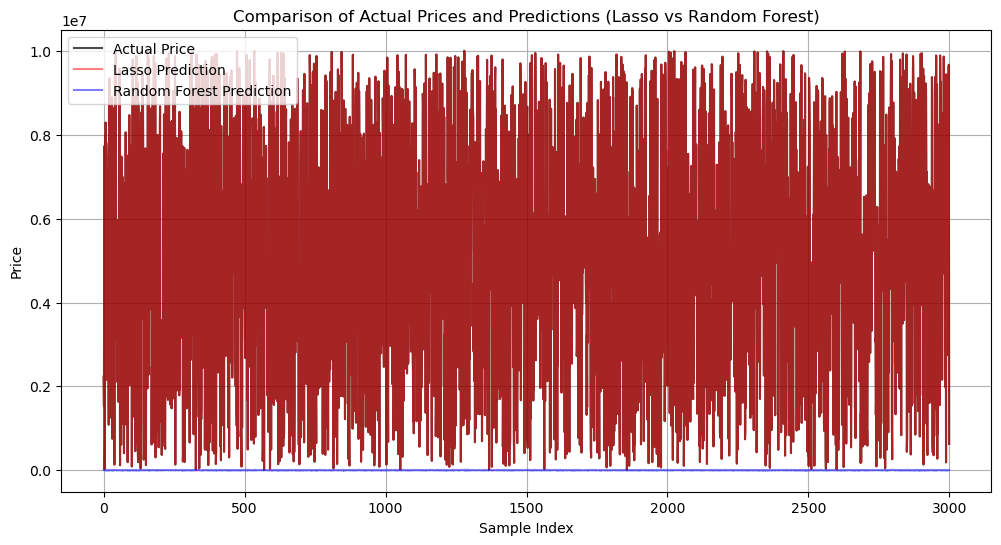

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual Price'].values, label='Actual Price', color='black', alpha=0.7)
plt.plot(comparison_df['Lasso Prediction'].values, label='Lasso Prediction', color='red', alpha=0.5)
plt.plot(comparison_df['Random Forest Prediction'].values, label='Random Forest Prediction', color='blue', alpha=0.5)  # Pastikan nama kolom ini benar
plt.title('Comparison of Actual Prices and Predictions (Lasso vs Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### Kesimpulan Evaluasi Model

1. **Model dan Kinerja**:
   - **Lasso Regression**:
     - **MAE**: 1466.16979
     - **MSE**: 3522128.18136
     - **RMSE**: 1876.73338
   - **Random Forest Regressor**:
     - **MAE**: 3145.35292
     - **MSE**: 15358471.79534
     - **RMSE**: 3918.98862

   **Penjelasan**:
   Lasso Regression menunjukkan metrik kesalahan yang jauh lebih rendah dibandingkan dengan Random Forest Regressor di semua metrik evaluasi (MAE, MSE, dan RMSE). Ini menunjukkan bahwa Lasso Regression menghasilkan prediksi yang lebih akurat dan memiliki kesalahan yang lebih kecil dalam estimasi harga.

2. **Perbandingan Prediksi**:
   - **Contoh Prediksi**:
     - **Actual Price**: 2,232,476.20
       - **Lasso Prediction**: 2,231,696.29
       - **Random Forest Prediction**: 7,570.64
       - **Lasso Difference**: 779.91
     - **Actual Price**: 1,523,752.90
       - **Lasso Prediction**: 1,523,193.06
       - **Random Forest Prediction**: 2,870.86
       - **Lasso Difference**: 559.84
     - **Actual Price**: 7,725,844.60
       - **Lasso Prediction**: 7,729,395.21
       - **Random Forest Prediction**: -4,444.38
       - **Lasso Difference**: -3,550.61
     - **Actual Price**: 28,656.50
       - **Lasso Prediction**: 27,961.26
       - **Random Forest Prediction**: 33.03
       - **Lasso Difference**: 695.24
     - **Actual Price**: 755,909.20
       - **Lasso Prediction**: 757,601.86
       - **Random Forest Prediction**: 713.30
       - **Lasso Difference**: -1,692.66

   **Penjelasan**:
   Lasso Regression menunjukkan prediksi yang lebih konsisten mendekati harga aktual dibandingkan Random Forest Regressor. Meskipun ada beberapa kesalahan dalam prediksi, perbedaan harga dengan Lasso Regression cenderung lebih kecil dan lebih stabil dibandingkan dengan prediksi yang dihasilkan oleh Random Forest.

3. **Kesimpulan**:
   Lasso Regression adalah model yang lebih baik untuk memprediksi harga dalam dataset ini karena:
   - MAE, MSE, dan RMSE yang jauh lebih rendah, menunjukkan kesalahan prediksi yang lebih kecil.
   - Perbedaan prediksi yang lebih konsisten dan lebih kecil terhadap harga aktual dibandingkan Random Forest Regressor.

Dengan demikian, **Lasso Regression** direkomendasikan sebagai model terbaik untuk prediksi harga dalam dataset ini.

Berdasarkan Perbandingan regresi Notebook pertama mendapatkan model terbaik Ridge Regression dan Notebook kedua yaitu Lasso Regression, berikut adalah perbandingan keduanya untuk menentukan model yang terbaik:

### 1. Hasil Evaluasi Model

#### Ridge Regression
- **Mean Absolute Error (MAE)**: 1,466.49
- **Mean Squared Error (MSE)**: 3,525,683.20
- **Root Mean Squared Error (RMSE)**: 1,877.68

#### Lasso Regression
- **Mean Absolute Error (MAE)**: 1,466.17
- **Mean Squared Error (MSE)**: 3,522,128.18
- **Root Mean Squared Error (RMSE)**: 1,876.73

### 2. Perbandingan Kinerja
- **MAE**:
  - Lasso Regression (1,466.17) sedikit lebih rendah dibandingkan Ridge Regression (1,466.49), menunjukkan Lasso menghasilkan kesalahan rata-rata yang lebih kecil.
  
- **MSE**:
  - Lasso Regression (3,522,128.18) juga memiliki nilai yang lebih rendah dibandingkan Ridge Regression (3,525,683.20), menandakan bahwa Lasso lebih baik dalam mengurangi kesalahan kuadrat.
  
- **RMSE**:
  - Lasso Regression (1,876.73) lebih baik dibandingkan Ridge Regression (1,877.68), menunjukkan bahwa Lasso lebih akurat dalam memprediksi harga.

### 3. Kesimpulan
- **Konsistensi Perbedaan Prediksi**:
  - Keduanya menunjukkan prediksi yang mendekati harga aktual, tetapi Lasso Regression memiliki perbedaan yang sedikit lebih kecil dan lebih stabil dibandingkan Ridge.

### 4. Model Terbaik
Berdasarkan metrik yang telah dievaluasi (MAE, MSE, dan RMSE), **Lasso Regression** adalah model terbaik di antara keduanya untuk prediksi harga dalam dataset ini.

**Rekomendasi**: **Gunakan Lasso Regression** sebagai model untuk prediksi harga karena memiliki kinerja yang sedikit lebih baik dibandingkan Ridge Regression.

In [26]:
import pickle

with open('BestModel_REG_Lasso_SciPy.pkl', 'wb') as r:
    pickle.dump(rf_kbest_model, r)

print("Model Lasso Regression berhasil disimpan")


Model Lasso Regression berhasil disimpan
